# Analise do meu Spotify

In [2279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2280]:
dados = pd.read_json('dados/StreamingHistory.json')

# Configuração de exibição do database
pd.options.display.max_rows = None

dados.head()

,endTime,artistName,trackName,msPlayed
0,2022-03-01 14:11,Hole,Doll Parts,129090
1,2022-04-17 21:07,Interpol,C'mere,81630
2,2022-04-17 21:08,Interpol,Pioneer To The Falls,44250
3,2022-04-17 21:08,Interpol,All the Rage Back Home,70410
4,2022-04-17 21:09,Interpol,Wrecking Ball,3130


# Limpeza dos dados

### Musicas

In [2281]:
colunas = ['artistName', 'trackName', 'msPlayed']
dados = dados.filter(items = colunas)
dados.head()

,artistName,trackName,msPlayed
0,Hole,Doll Parts,129090
1,Interpol,C'mere,81630
2,Interpol,Pioneer To The Falls,44250
3,Interpol,All the Rage Back Home,70410
4,Interpol,Wrecking Ball,3130


## Tradução das colunas

In [2282]:
renomear = {
    'artistName' : 'Artista',
    'trackName' : 'Musica', 
    'msPlayed' : 'msPlayed'
}

In [2283]:
dados.rename(columns = renomear, inplace = True)
dados.head()

,Artista,Musica,msPlayed
0,Hole,Doll Parts,129090
1,Interpol,C'mere,81630
2,Interpol,Pioneer To The Falls,44250
3,Interpol,All the Rage Back Home,70410
4,Interpol,Wrecking Ball,3130


## Dicionario dos dados

- **Artista:**  Nome do “criador” de cada streaming (por exemplo, o nome do artista no caso de uma música).
- **Musica:**   Nomes dos itens reproduzidos (por exemplo, nome da música ou do vídeo).
- **msPlayed:** Mostra por quantos milésimos de segundos uma faixa foi reproduzida.

In [2284]:
print("Quantidades de linhas e colunas: ", dados.shape)

Quantidades de linhas e colunas:  (7590, 3)


In [2285]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Artista   7590 non-null   object
 1   Musica    7590 non-null   object
 2   msPlayed  7590 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 178.0+ KB


In [2286]:
for coluna in dados.columns:
    print('---------')
    print(f'Numero de dados unicos: {dados[coluna].nunique()}')
    print(f'Dados unicos: {dados[coluna].unique()}')
    print(dados[coluna].value_counts())
    print(f'Tipo da coluna: {dados[coluna].dtype}')

---------
Numero de dados unicos: 1023
Dados unicos: ['Hole' 'Interpol' 'Racquet Club' ... 'Def' 'Street Bulldogs'
 'Dirty Pretty Things']
Red Hot Chili Peppers                                            149
Millencolin                                                      128
blink-182                                                        113
Green Day                                                         92
Vespas Mandarinas                                                 84
NOFX                                                              84
Alkaline Trio                                                     78
Modern Baseball                                                   74
Matanza                                                           74
Charlie Brown Jr.                                                 72
CPM 22                                                            72
Nirvana                                                           71
Violet Soda                      

### Relatorio da Analise dos Dados

- Na coluna 'Musica' foi Observado que temos varios registros repetidos

- Na coluna 'msPlayed' temos registros nulos

## Corrigindo as incosistências nos dados

###  Analisando Coluna 'Musica'

In [2287]:
dados.loc[dados['Musica']== 'Love Is Only a Feeling']

,Artista,Musica,msPlayed
2025,The Darkness,Love Is Only a Feeling,201680
2027,The Darkness,Love Is Only a Feeling,260680
2033,The Darkness,Love Is Only a Feeling,260680
2034,The Darkness,Love Is Only a Feeling,260680
2039,The Darkness,Love Is Only a Feeling,260680
2054,The Darkness,Love Is Only a Feeling,479681
2058,The Darkness,Love Is Only a Feeling,259530
2106,The Darkness,Love Is Only a Feeling,230080
2107,The Darkness,Love Is Only a Feeling,260680
2109,The Darkness,Love Is Only a Feeling,238960


Analisando o dataset podemos ver que foram adicionados varios registros da mesma musica porem com msPlayed diferente

Vou agrupar pelo nome da música e artista e somar o msPlayed

In [2288]:
dados = dados.groupby(['Artista', 'Musica'], as_index=False)['msPlayed'].sum()

In [2289]:
for coluna in dados.columns:
    print('---------')
    print(f'Numero de dados unicos: {dados[coluna].nunique()}')
    print(f'Dados unicos: {dados[coluna].unique()}')
    print(dados[coluna].value_counts())
    print(f'Tipo da coluna: {dados[coluna].dtype}')

---------
Numero de dados unicos: 1023
Dados unicos: ['+44' '10,000 Maniacs' '1208' ... 'surrenderdorothy' 'zebrahead'
 'É O Tchan']
Millencolin                                                      52
Red Hot Chili Peppers                                            41
blink-182                                                        40
Green Day                                                        40
Nirvana                                                          32
NOFX                                                             31
Os Barões Da Pisadinha                                           27
Alkaline Trio                                                    26
Matanza                                                          26
Dinosaur Jr.                                                     24
Lagwagon                                                         24
Charlie Brown Jr.                                                23
Misfits                                            

Numero de dados unicos: 2464
Dados unicos: [167143 110430 458580 ... 178836  68350  28080]
0          19
1200        7
1360        7
1160        7
1840        7
2520        6
3590        6
2630        6
650         6
1170        6
890         6
910         6
1300        6
1270        6
1020        6
2030        5
1320        5
2050        5
860         5
770         5
2130        5
1180        5
1580        5
800         5
3070        5
1730        5
1400        4
760         4
2370        4
1130        4
2910        4
2200        4
1330        4
1530        4
1120        4
920         4
3290        4
1710        4
2070        4
2430        4
1890        4
1000        4
620         4
820         4
900         4
1190        4
1950        4
630         4
1250        4
2100        4
1100        4
940         4
2150        4
1110        4
1660        4
2580        4
1600        4
1800        4
1090        4
640         4
1150        4
1260        4
1070        4
2470        4
1720        4

In [2290]:
dados.loc[dados['Musica']== 'Torn']

,Artista,Musica,msPlayed
494,Creed,Torn,64200
1604,Natalie Imbruglia,Torn,252063
1612,Neck Deep,Torn,547190


Os registros que continuaram com o mesmo nome são musicas de mesmo nome porem bandas diferentes, podendo ser até mesmo versões da mesma musica.

### Analisando Coluna 'msPlayed'

In [2291]:
dados.loc[dados['msPlayed']== 0]

,Artista,Musica,msPlayed
108,Alkaline Trio,Burn,0
164,Aoife O'Donovan,The King of All Birds,0
206,Autoramas,Você Sabe,0
472,Coldplay,Viva La Vida,0
479,Concrete Blonde,Joey,0
602,Dibob,Desejo,0
711,Everlast,What It's Like,0
853,Garage Fuzz,Shore of Hope,0
915,Green Day,Hitchin' a Ride,0
968,Hardneja Sertacore,Estou Apaixonado,0


Apos analise decidi manter essas musicas no database pois acho que remove-las ira influenciar no numero de musicas para cada banda.

### Calcular o numero de minutos escutados apartir da coluna msPlayed

In [2292]:
dados.insert(2, 'Minutos_Tocados', (dados['msPlayed'] / 60000).round(2))

# Removendo a coluna msPlayed
dados = dados.drop('msPlayed', axis=1)

In [2293]:
dados.head()

,Artista,Musica,Minutos_Tocados
0,+44,Baby Come On,2.79
1,+44,Baby Come On - AOL Music Sessions,1.84
2,+44,Baby Come On - Acoustic Version,7.64
3,+44,Cliff Diving - AOL Music Sessions,1.08
4,+44,Guten Tag,0.06


Irei dividir em dois dataframes para fazer uma analise do tempo escutado das bandas

In [2294]:
# agrupa pelo nome do artista e soma o msPlayed
dados_bandas = dados.groupby('Artista', as_index=False)['Minutos_Tocados'].sum()

# Analise do database

In [2295]:
print(f'Numero de bandas: {dados.Artista.nunique()}')

Numero de bandas: 1023


## Bandas mais tocadas

In [2296]:
# ordena os resultados em ordem decrescente de msPlayed
dados_bandas = dados_bandas.sort_values('Minutos_Tocados', ascending=False)

# reseta o índice do dataframe
dados_bandas = dados_bandas.reset_index(drop=True)

In [2297]:
# Lista decrecente por ordem de mais tocadas no database
dados_bandas

,Artista,Minutos_Tocados
0,Red Hot Chili Peppers,347.05
1,Vespas Mandarinas,159.95
2,The Darkness,148.72
3,Weezer,121.21
4,Alkaline Trio,120.30
5,Millencolin,120.25
6,Green Day,110.82
7,Armandinho,109.96
8,Garage Fuzz,97.34
9,Toadies,92.91


In [2298]:
# Função para plotar graficos

def plotar(eixo_x, eixo_y, numero_de_bandas, database, titulo, label_x, label_y, nome_do_arquivo): 
    
    # define o tamanho da figura
    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(left=0.3)
    
    #plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
    
    # Define uma escala de cores
    spotify_green = "#1DB954"
    green_cmap = LinearSegmentedColormap.from_list('green', [(0, (0.3, 0.85, 0.5)), (0.5, spotify_green), (1, (0, 0.3, 0))])

    # Gera uma lista de valores entre 0 e 1 para definir a intensidade da cor em cada barra
    values = np.linspace(1, 0, numero_de_bandas)

    # Define as cores das barras usando a escala de cores e os valores gerados
    colors = [green_cmap(value) for value in values]
    
    # cria um gráfico de barras com os valores de "Minutos_Tocados"
    plt.barh(database[eixo_x][:numero_de_bandas], database[eixo_y][:numero_de_bandas], color=colors)
    plt.gca().invert_yaxis()

    # adiciona um título ao gráfico
    plt.title(titulo, loc='left', fontsize=18)

    # adiciona uma label ao eixo x
    plt.xlabel(label_x, fontsize=14)

     # adiciona uma label ao eixo y
    plt.ylabel(label_y, fontsize=14)
    
    # rotaciona os rótulos do eixo x para evitar sobreposição
    #plt.xticks(rotation=90)

    plt.savefig(nome_do_arquivo, dpi=300, bbox_inches='tight')
    plt.show()

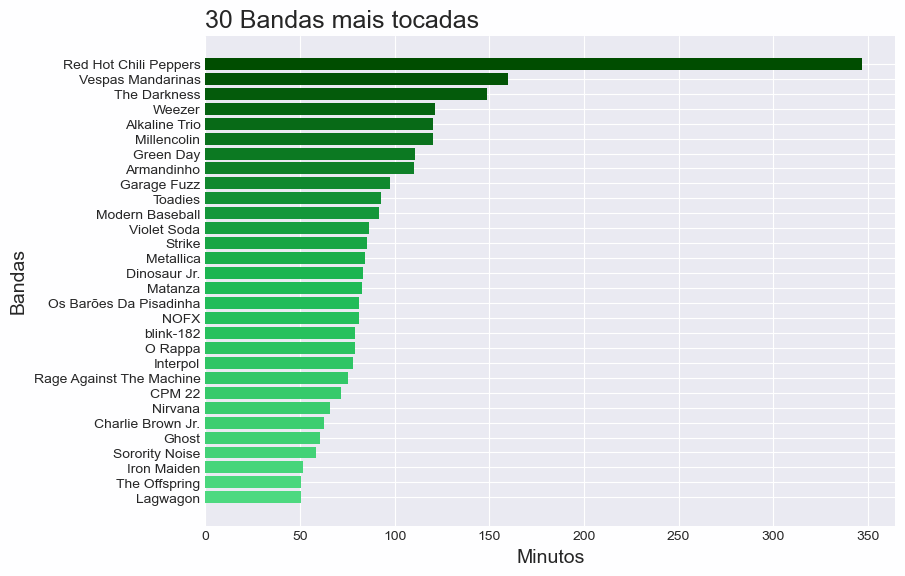

In [2299]:
top_bandas = plotar('Artista', 'Minutos_Tocados', 30,
                  dados_bandas, '30 Bandas mais tocadas', 'Minutos', 'Bandas', "bandas-minutos.png")

## Bandas com mais musicas na lista

In [2300]:
# Dataframe com os artistas mais frequentes
todasBandas = dados.Artista.value_counts().to_frame()[:]

# transformar o index em coluna
todasBandas.reset_index(level=0, inplace=True)

todasBandas.columns = ['Artista', 'Quantidade de Músicas']

todasBandas

,Artista,Quantidade de Músicas
0,Millencolin,52
1,Red Hot Chili Peppers,41
2,blink-182,40
3,Green Day,40
4,Nirvana,32
5,NOFX,31
6,Os Barões Da Pisadinha,27
7,Alkaline Trio,26
8,Matanza,26
9,Dinosaur Jr.,24


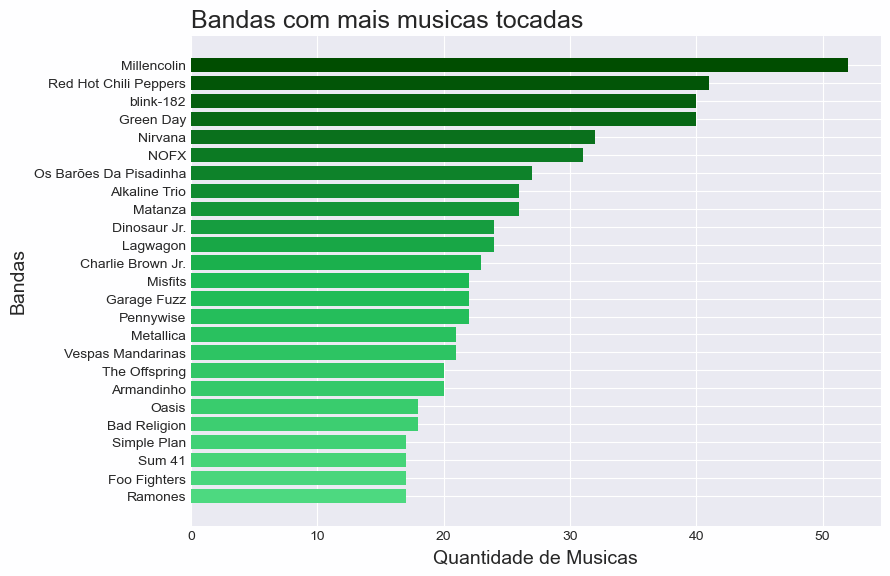

In [2301]:
qnt_musicas = plotar('Artista', 'Quantidade de Músicas', 25, todasBandas,
                   'Bandas com mais musicas tocadas', 'Quantidade de Musicas', 'Bandas', "bandas-musicas.png")

## Musicas mais ouvidas

In [2302]:
print(f'Foram {dados.Minutos_Tocados.sum()} minutos de musica tocada \
\nQue equivalem a {round(dados.Minutos_Tocados.sum() / 60)} horas \
\nOu {round((dados.Minutos_Tocados.sum() / 60) / 24)} dias')

Foram 8984.35 minutos de musica tocada 
Que equivalem a 150 horas 
Ou 6 dias


In [2303]:
dados = dados.sort_values('Minutos_Tocados', ascending=False)
dados = dados.reset_index(drop=True)
dados

,Artista,Musica,Minutos_Tocados
0,The Darkness,Love Is Only a Feeling,109.40
1,Toadies,Tyler,85.68
2,Red Hot Chili Peppers,Brendan's Death Song,59.39
3,Ghost,Mary On A Cross,51.92
4,Vespas Mandarinas,Antes Que Você Conte Até Dez - Bônus,43.78
5,Red Hot Chili Peppers,Soul to Squeeze,37.36
6,O Rappa,A feira,36.41
7,Alkaline Trio,Hell Yes,35.37
8,Racquet Club,Head Full of Bees,34.75
9,Death Cab for Cutie,I Will Follow You into the Dark,29.70


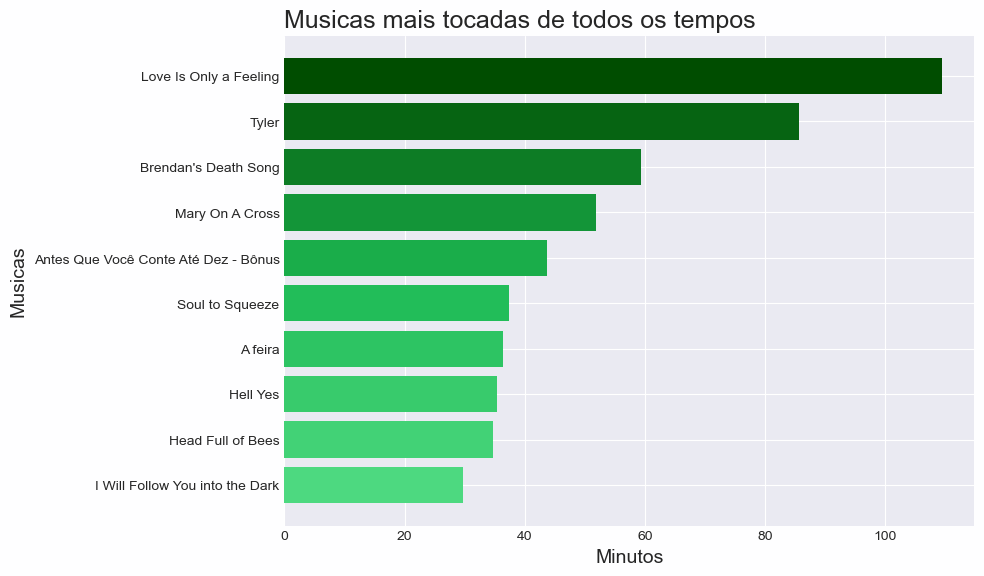

In [2304]:
plotar('Musica', 'Minutos_Tocados', 10, dados,
                   'Musicas mais tocadas de todos os tempos', 'Minutos', 'Musicas', "musicas.png")

In [2305]:
musica_mais_tocada = dados.loc[dados.groupby('Artista')['Minutos_Tocados'].idxmax()]
musica_mais_tocada = musica_mais_tocada.sort_values('Artista', ascending=True)
musica_mais_tocada = musica_mais_tocada.reset_index(drop=True)

# Lista das musicas mais tocadas de cada banda
musica_mais_tocada

,Artista,Musica,Minutos_Tocados
0,+44,Lycanthrope,14.10
1,"10,000 Maniacs",Because the Night - Live Unplugged,7.45
2,1208,Fall Apart,1.62
3,123 Segundos,Lula e Militares + Investiga Políticas,0.04
4,2 minutos,Barricada,0.04
5,3 Doors Down,Kryptonite,1.37
6,311,Down,5.94
7,38 Special,Caught Up In You - Live - Nassau Coliseum Unio...,1.81
8,4 Non Blondes,What's Up?,6.12
9,88 Fingers Louie,100 Proof,7.58


### O mais brabo

In [2306]:
dados.loc[dados['Artista']== 'Rodrigo Colaço']

,Artista,Musica,Minutos_Tocados
2132,Rodrigo Colaço,O Tempo,0.09
